 #### Ever wondered which Pittsburgh neighborhood sleeps the most peacefully at night?                                            In this notebook, we’ll explore real arrest data to uncover where crime is least common and visualize our findings.

Step 1: Load the Data

Before we dive into the numbers, let’s grab our data and take a peek!
We’ll import the dataset and see what kind of information we’re working with.

In [4]:
import matplotlib.pyplot as plt
import pandas as pd 

crimes_df = pd.read_csv("criminalactivity.csv")
print('Preview of dataset:')
crimes_df.head(10)

Preview of dataset:


/scratch/slurm-25141/ipykernel_1401203/3621474930.py:4: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  crimes_df = pd.read_csv("criminalactivity.csv")


,_id,Report_Number,ReportedDate,ReportedTime,Hour,DayofWeek,ReportedMonth,NIBRS_Coded_Offense,NIBRS_Offense_Code,NIBRS_Offense_Category,NIBRS_Offense_Type,NIBRS_Crime_Against,NIBRS_Offense_Grouping,Violation,XCOORD,YCOORD,Zone,Tract,Neighborhood,Block_Address
0,1,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,13A AGGRAVATED ASSAULT,13A,Assault Offenses,Aggravated Assault,Person,A,18 2718 A1 Strangulation Basic - Applying,-80.0268,40.3964,Zone 6,1919.0,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
1,2,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,13C INTIMIDATION,13C,Assault Offenses,Intimidation,Person,A,18 2706 A1 Terroristic Threats-General,-80.0268,40.3964,Zone 6,1919.0,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
2,3,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,90Z ALL OTHER OFFENSES,90Z,All other Offenses,All other Offenses,Group B,B,75 3733 A Fleeing or Attempting To Elude Polic...,-80.0268,40.3964,Zone 6,1919.0,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
3,4,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,23H ALL OTHER LARCENY,23H,Larceny/Theft Offenses,All Other Larceny,Property,A,18 3921 A Theft by Unlawful Taking-Movable – L...,-80.0268,40.3964,Zone 6,1919.0,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
4,5,PGHP24000017,2024-01-01,00:21,0,Monday,Jan,9999 Vehicle Offense (Not NIBRS Reportable),999,Not NIBRS Reportable,Not NIBRS Reportable,Group B,B,LO 6 101 Discharge of Firearms Prohibited,-80.0243,40.4582,Zone 1,2107.0,Manchester,"1200 Block of COLUMBUS AVE Pittsburgh, PA"
5,6,PGHP24000124,2024-01-01,00:42,0,Monday,Jan,23D THEFT FROM BUILDINGS,23D,Larceny/Theft Offenses,Theft from Building,Property,A,18 3921 A Theft by Unlawful Taking-Movable – F...,-79.9017,40.4502,Zone 4,1405.0,Point Breeze North,"7100 Block of MEADE ST Pittsburgh, PA"
6,7,PGHP24000112,2024-01-01,01:55,1,Monday,Jan,13A AGGRAVATED ASSAULT,13A,Assault Offenses,Aggravated Assault,Person,A,"18 2705 Recklessly Endangering Another Person,...",-79.9811,40.4296,Zone 3,1702.0,South Side Flats,"1700 Block of SIDNEY ST Pittsburgh, PA"
7,8,PGHP24000112,2024-01-01,01:55,1,Monday,Jan,90Z ALL OTHER OFFENSES,90Z,All other Offenses,All other Offenses,Group B,B,18 907 A Possess Instruments of Crime with Intent,-79.9811,40.4296,Zone 3,1702.0,South Side Flats,"1700 Block of SIDNEY ST Pittsburgh, PA"
8,9,PGHP24000112,2024-01-01,01:55,1,Monday,Jan,9999 Vehicle Offense (Not NIBRS Reportable),999,Not NIBRS Reportable,Not NIBRS Reportable,Group B,B,LO 6 101 Discharge of Firearms Prohibited,-79.9811,40.4296,Zone 3,1702.0,South Side Flats,"1700 Block of SIDNEY ST Pittsburgh, PA"
9,10,PGHP24000112,2024-01-01,01:55,1,Monday,Jan,90E DRUNKENNESS,90E,All other Offenses,Drunkenness,Group B,B,18 5505 Public Drunkenness,-79.9811,40.4296,Zone 3,1702.0,South Side Flats,"1700 Block of SIDNEY ST Pittsburgh, PA"


Step 2: Clean Up Our Data

Our data’s a little messy
Let’s tidy things up: we’ll drop missing neighborhoods and standardize names so everything looks clean and consistent.

In [9]:
crimes_df = crimes_df.dropna(subset=['Neighborhood'])
vio_crimes = [
    "Assault Offenses",
    "Robbery",
    "Homicide Offenses",
    "Kidnapping/Abduction",
    "Sex Offenses",
    "Arson"
]

crimes_df = crimes_df[crimes_df['NIBRS_Offense_Category'].isin(vio_crimes)]
crimes_df['Neighborhood'] = crimes_df['Neighborhood'].str.strip().str.title()
crimes_df.head()

,_id,Report_Number,ReportedDate,ReportedTime,Hour,DayofWeek,ReportedMonth,NIBRS_Coded_Offense,NIBRS_Offense_Code,NIBRS_Offense_Category,NIBRS_Offense_Type,NIBRS_Crime_Against,NIBRS_Offense_Grouping,Violation,XCOORD,YCOORD,Zone,Tract,Neighborhood,Block_Address
0,1,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,13A AGGRAVATED ASSAULT,13A,Assault Offenses,Aggravated Assault,Person,A,18 2718 A1 Strangulation Basic - Applying,-80.0268,40.3964,Zone 6,1919.0,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
1,2,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,13C INTIMIDATION,13C,Assault Offenses,Intimidation,Person,A,18 2706 A1 Terroristic Threats-General,-80.0268,40.3964,Zone 6,1919.0,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
6,7,PGHP24000112,2024-01-01,01:55,1,Monday,Jan,13A AGGRAVATED ASSAULT,13A,Assault Offenses,Aggravated Assault,Person,A,"18 2705 Recklessly Endangering Another Person,...",-79.9811,40.4296,Zone 3,1702.0,South Side Flats,"1700 Block of SIDNEY ST Pittsburgh, PA"
15,16,PGHP24000155,2024-01-01,02:42,2,Monday,Jan,13A AGGRAVATED ASSAULT,13A,Assault Offenses,Aggravated Assault,Person,A,18 2718 A1 Strangulation Enhanced – Applying F...,-79.8875,40.4589,Zone 5,1301.0,Homewood North,"1200 Block of MOHLER ST Pittsburgh, PA"
16,17,PGHP24000134,2024-01-01,02:08,2,Monday,Jan,13B SIMPLE ASSAULT,13B,Assault Offenses,Simple Assault,Person,A,18 2701 A1 Simple Assault-General,-79.9800,40.4245,Zone 3,1706.0,South Side Slopes,"100 Block of PIUS ST Pittsburgh, PA"


Step 3: Count the Crimes

We’ll count how many crimes occurred in each neighborhood so we can see which ones are the quietest

In [6]:
crime_by_neighborhood = crimes_df['Neighborhood'].value_counts().reset_index()
crime_by_neighborhood.columns = ['Neighborhood', 'Crime_Count']
crime_by_neighborhood = crime_by_neighborhood.sort_values(by='Crime_Count', ascending=True)
crime_by_neighborhood.head(10)

,Neighborhood,Crime_Count
90,Ridgemont,3
89,Regent Square,5
88,Swisshelm Park,6
87,Saint Clair,7
86,Chartiers,9
84,Allegheny West,14
85,New Homestead,14
82,East Carnegie,17
83,Esplen,17
81,Summer Hill,19


Step 4: Find the Safest Neighborhood


Let’s find out which Pittsburgh neighborhood had the fewest crimes

In [7]:
safest = crime_by_neighborhood.iloc[0]

print("The safest neighborhood in Pittsburgh is:",
      safest['Neighborhood'],
      "with only",
      safest['Crime_Count'],
      "violent crimes recorded.")

The safest neighborhood in Pittsburgh is: Ridgemont with only 3 violent crimes recorded.


Step 5: Visualize the Safest Spots

Let’s plot the 10 neighborhoods with the fewest crimes and see what Pittsburgh’s safest areas look like on a chart.

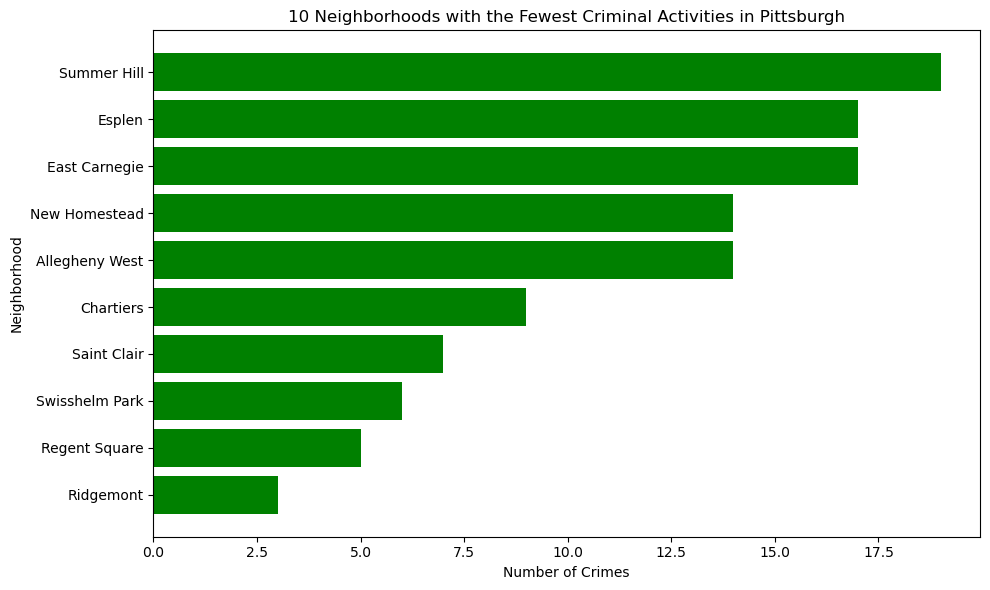

In [8]:
bottom_10 = crime_by_neighborhood.head(10)

plt.figure(figsize=(10,6))
plt.barh(bottom_10['Neighborhood'], bottom_10['Crime_Count'], color='green')
plt.title('10 Neighborhoods with the Fewest Criminal Activities in Pittsburgh')
plt.xlabel('Number of Crimes')
plt.ylabel('Neighborhood')

plt.tight_layout()
plt.show()